# Авторынок Казахстана 2019

 ## Цель проекта


- Сделать выводы / дать рекомендации
- Что делать дальше автодилеру при текущей ситуации?
 
 ## Описание данных
 
- год продажи (0)
- месяц, когда совершена сделка (1)
- компания(2)
- бренд машины(3)
- модель (4)
- модификация(5)
- год выпуска машины(6)
- страна производитель(7)
- вид топлива (бензин/дизель)(8)
- объем двигателя в литрах(9)
- коробка передач (10)
- Тип привода(11)
- Сегмент(12)
- Регион(13)
- Наименование дилерского центра(14)
- Тип клиента(15)
- Форма расчета(16)
- Количество(17)
- Цена, USD(18)
- Продажа, USD(19)
- Область(20)
- Сегментация(21)
- Класс(22)
- Сегментация Eng (23)
- Локализация производства (24)
 
 ## План работы
 
 - Очистить данные.
 - Провести исследовательский анализ данных.
 - Проанализировать рынок.
 - Посчитать показатели: прибыль и выручка, емкость рынка, долю рынка.
 - Посмотреть конкурентов.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка</a></span><ul class="toc-item"><li><span><a href="#Удаляем-столбцы:-наименование-дилерского-центра,-форма-расчета,-сегментация,-сегмент-eng,-локализация,-модификация-(для-нашего-анализа-они-не-представляют-ценности)" data-toc-modified-id="Удаляем-столбцы:-наименование-дилерского-центра,-форма-расчета,-сегментация,-сегмент-eng,-локализация,-модификация-(для-нашего-анализа-они-не-представляют-ценности)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Удаляем столбцы: наименование дилерского центра, форма расчета, сегментация, сегмент eng, локализация, модификация (для нашего анализа они не представляют ценности)</a></span></li></ul></li><li><span><a href="#Приводим-столбцы-к-английским-названиям-для-удобства" data-toc-modified-id="Приводим-столбцы-к-английским-названиям-для-удобства-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приводим столбцы к английским названиям для удобства</a></span></li><li><span><a href="#Подсчет-пропусков-и-их-доля." data-toc-modified-id="Подсчет-пропусков-и-их-доля.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подсчет пропусков и их доля.</a></span></li><li><span><a href="#Анализ-рынка" data-toc-modified-id="Анализ-рынка-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ рынка</a></span></li><li><span><a href="#Подсчет-показателей" data-toc-modified-id="Подсчет-показателей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подсчет показателей</a></span></li><li><span><a href="#Ёмкость-рынка" data-toc-modified-id="Ёмкость-рынка-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ёмкость рынка</a></span></li><li><span><a href="#Доля-рынка" data-toc-modified-id="Доля-рынка-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Доля рынка</a></span></li><li><span><a href="#Конкуренты." data-toc-modified-id="Конкуренты.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Конкуренты.</a></span></li></ul></div>

# Описание проекта



 Мы распологаем с данными по продажам автомобилей в Казахстане за 2019 год. Они получены из официальной статистики VAG, после перевода из эксель в csv обнаружились множественные проблемы с исходными данными: некорректные разделители десятичных разрядов, несоответствие данных типу данных. Дополнительной проблемой является то, что статистику собирал не один
человек, поэтому есть неявные дубликаты - например, 4WD, 4 WD и 4-WD, а также одни и те же признаки могут быть записаны как на русском, так и на английском языке. Также необходимо очистить датасет от лишних столбцов, которые используют технические специалисты, но которые не нужны в управленческом учете.

# Чтение данных

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
import math as mth

from datetime import datetime as dt
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('ggplot')
#sns.set_style('whitegrid') # стиль

In [2]:
#dtype='str' можно использовать, чтобы принудительно обозначить, что данные в 7,10 колонках - строки,
# но тогда и остальное типы данных будут object. Если не использовать, то будет предупреждение. Нас оно устроит.
try:
    df = pd.read_csv('kz_2019_final_all_dirt.csv', index_col=0 ) #, dtype='str')
except: 
    url = 'https://drive.google.com/kz_2019_final_all_dirt.csv'
    file_path = 'data_new_auto.csv'
    df = pd.read_csv(file_path, sep=',', index_col=0) #, dtype='str')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6688\1606305492.py:4: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kz_2019_final_all_dirt.csv', index_col=0 ) #, dtype='str')


In [3]:
df.head(8) # первые 8 строк

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,1.4,S-tronic,NaN,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.00,31250.00,31250.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,S-Тronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.00,30581.00,30581.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Июнь,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,S-Тroic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Астана,Физ. Лицо,наличный,1.00,35087.72,35087.72,г.Алматы,Легковые автомобили,C класс,C,Импорт
3,2019,Июль,Mercur Auto,Audi,A3,TFSI,2017,Германия,Бензин,1.4,S-troic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.00,26608.23,26608.23,г.Алматы,Легковые автомобили,C класс,C,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,A4 Allroad TFSI,2017,Германия,Бензин,2,S-troic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.00,48343.98,48343.98,г.Алматы,Легковые автомобили,D класс,D,Импорт
5,2019,Июнь,Mercur Auto,Audi,A5,TFSI,2017,Германия,Бензин,2,S-Тroic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Астана,Юр. Лицо,безналичный,1.00,52760.74,52760.74,г.Алматы,Легковые автомобили,Спортивные автомобили,G1,Импорт
6,2019,Январь,Mercur Auto,Audi,A6,TFSI,2017,Германия,Бензин,2,S-tronic,quattro,Легковые автомобили Premium,Костанай,Автодом Костанай,Физ. Лицо,NaN,1.00,54288.37,54288.37,Костанайская область,Легковые автомобили,E класс,E,Импорт
7,2019,Январь,Mercur Auto,Audi,A6,TFSI,2017,Германия,Бензин,2,S-tronic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,NaN,1.00,54109.23,54109.23,г.Алматы,Легковые автомобили,E класс,E,Импорт


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             32854 non-null  int64  
 1   Месяц                           32854 non-null  object 
 2   Компания                        32854 non-null  object 
 3   Бренд                           32854 non-null  object 
 4   Модель                          32854 non-null  object 
 5   Модификация                     29729 non-null  object 
 6   Год выпуска                     32700 non-null  object 
 7   Страна-производитель            32854 non-null  object 
 8   Вид топлива                     31942 non-null  object 
 9   Объём двиг, л,                  30968 non-null  object 
 10  Коробка передач                 31662 non-null  object 
 11  Тип привода                     30589 non-null  object 
 12  Сегмент                         

# Данные, которыми располагаем

- год продажи (0)
- месяц, когда совершена сделка (1)
- компания(2)
- бренд машины(3)
- модель (4)
- модификация(5)
- год выпуска машины(6)
- страна производитель(7)
- вид топлива (бензин/дизель)(8)
- объем двигателя в литрах(9)
- коробка передач (10)
- Тип привода(11)
- Сегмент(12)
- Регион(13)
- Наименование дилерского центра(14)
- Тип клиента(15)
- Форма расчета(16)
- Количество(17)
- Цена, USD(18)
- Продажа, USD(19)
- Область(20)
- Сегментация(21)
- Класс(22)
- Сегментация Eng (23)
- Локализация производства (24) 

## Предобработка

### Удаляем столбцы: наименование дилерского центра, форма расчета, сегментация, сегмент eng, локализация, модификация (для нашего анализа они не представляют ценности)

In [5]:
df.drop(df.columns[[5,12,14,16,23,24]], axis = 1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Год                   32854 non-null  int64  
 1   Месяц                 32854 non-null  object 
 2   Компания              32854 non-null  object 
 3   Бренд                 32854 non-null  object 
 4   Модель                32854 non-null  object 
 5   Год выпуска           32700 non-null  object 
 6   Страна-производитель  32854 non-null  object 
 7   Вид топлива           31942 non-null  object 
 8   Объём двиг, л,        30968 non-null  object 
 9   Коробка передач       31662 non-null  object 
 10  Тип привода           30589 non-null  object 
 11  Регион                32854 non-null  object 
 12  Тип клиента           27124 non-null  object 
 13  Количество            32849 non-null  float64
 14  Цена, USD             32854 non-null  float64
 15  Продажа, USD       

**Выводы:**
- Большинство данных имеют тип object, но пока что можно оставить их такими, какие они есть и по мере анализа менять при необходимости.

## Приводим столбцы к английским названиям для удобства

In [7]:
df = df.rename(columns={'Страна-производитель':'country',
                            'Год': 'year_sale',
                            'Месяц': 'month_sale',
                            'Компания' : 'company',
                            'Бренд': 'brand',
                            'Модель': 'model',
                            'Год выпуска': 'year',
                            'Вид топлива': 'fuel',
                            'Объём двиг, л,' : 'volume',
                            'Коробка передач': 'transmission',
                            'Тип привода': 'type_drive',
                            'Сегментация 2013': 'segment',
                            'Регион': 'region',
                            'Тип клиента':'client',
                            'Количество' : 'sum',
                            'Цена, USD':'price_usd',
                            'Продажа, USD' : 'sale_usd',
                            'Область': 'area',
                            'Класс 2013' : 'class'})
df.head()

,year_sale,month_sale,company,brand,model,year,country,fuel,volume,transmission,type_drive,region,client,sum,price_usd,sale_usd,area,segment,class
0,2019,Март,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-tronic,NaN,Алматы,Физ. Лицо,1.00,31250.00,31250.00,г.Алматы,Легковые автомобили,C класс
1,2019,Май,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тronic,FWD,Алматы,Физ. Лицо,1.00,30581.00,30581.00,г.Алматы,Легковые автомобили,C класс
2,2019,Июнь,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тroic,FWD,Алматы,Физ. Лицо,1.00,35087.72,35087.72,г.Алматы,Легковые автомобили,C класс
3,2019,Июль,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-troic,передний,Алматы,Физ. Лицо,1.00,26608.23,26608.23,г.Алматы,Легковые автомобили,C класс
4,2019,Июль,Mercur Auto,Audi,A4,2017,Германия,Бензин,2,S-troic,quattro,Алматы,Юр. Лицо,1.00,48343.98,48343.98,г.Алматы,Легковые автомобили,D класс


In [8]:
# делаем копию датасета, поможет в дальнейшем посчитать количество потерянных при обработке данных
avto = df.copy(deep=True) 

In [9]:
# Просмотр месяцев
avto['month_sale'].unique()

array(['Март', 'Май', 'Июнь', 'Июль', 'Январь', 'Февраль', 'Апрель',
       'Август', 'Сентябрь'], dtype=object)

In [10]:
avto['month_sale'].value_counts() # чтение событий

Август      4199
Июнь        4172
Сентябрь    4148
Май         4113
Июль        3836
Апрель      3402
Февраль     3245
Март        3232
Январь      2507
Name: month_sale, dtype: int64

In [11]:
# переименование месяцев в числа
def event(param): # Через ключевое слово def задают имя функции, а в скобках — её параметры. 
    if param == 'Январь':
        return '1'
    elif param == 'Февраль':
        return '2'
    elif param == 'Март':
        return '3'
    elif param == 'Апрель':
        return '4'
    elif param == 'Май':
        return '5'
    elif param == 'Июнь':
        return '6'
    elif param == 'Июль':
        return '7'
    elif param == 'Август':
        return '8'
    elif param == 'Сентябрь':
        return '9'
avto['month_sale'] = avto['month_sale'].apply(event)
# преобразование значений столбца month_sale в числовой формат
avto['month_sale'] = pd.to_numeric(avto['month_sale'])

# проверка результата
avto['month_sale'].value_counts() # чтение событий

8    4199
6    4172
9    4148
5    4113
7    3836
4    3402
2    3245
3    3232
1    2507
Name: month_sale, dtype: int64

In [12]:
# Чтобы объединить два столбца column1 и column2 в один столбец new_column в датафрейме df,
#можно воспользоваться методом apply и функцией lambda:
avto['date_sale'] = avto.apply(lambda row: str(row['month_sale']) + '_' + str(row['year_sale']), axis=1)
# Здесь axis=1 означает, что функция lambda будет применена к каждой строке датафрейма.
#В результате выполнения кода в датафрейме df будет создан новый столбец new_column,
#который содержит объединенные значения из столбцов column1 и column2.
avto.head()

,year_sale,month_sale,company,brand,model,year,country,fuel,volume,transmission,type_drive,region,client,sum,price_usd,sale_usd,area,segment,class,date_sale
0,2019,3,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-tronic,NaN,Алматы,Физ. Лицо,1.00,31250.00,31250.00,г.Алматы,Легковые автомобили,C класс,3_2019
1,2019,5,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тronic,FWD,Алматы,Физ. Лицо,1.00,30581.00,30581.00,г.Алматы,Легковые автомобили,C класс,5_2019
2,2019,6,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тroic,FWD,Алматы,Физ. Лицо,1.00,35087.72,35087.72,г.Алматы,Легковые автомобили,C класс,6_2019
3,2019,7,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-troic,передний,Алматы,Физ. Лицо,1.00,26608.23,26608.23,г.Алматы,Легковые автомобили,C класс,7_2019
4,2019,7,Mercur Auto,Audi,A4,2017,Германия,Бензин,2,S-troic,quattro,Алматы,Юр. Лицо,1.00,48343.98,48343.98,г.Алматы,Легковые автомобили,D класс,7_2019


In [13]:
avto.duplicated().sum()  # подсчёт дубликатов

15936

**Выводы:**
- Дубликатов достаточно много, но если предположить, что разные люди покупали машину в одной и той же комплектации у одного дилера,то лучше оставить как есть. В противном случае можно потерять большое количество данных.

## Подсчет пропусков и их доля.

In [14]:
def nan_values(avto):
    count_missing = avto.isna().sum()
    percent_missing = round(avto.isna().sum() * 100 / len(avto), 2)
    
    missing_value_av = pd.DataFrame({'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_av

nan_values(avto)

,num_missing,percent_missing
year_sale,0,0.00
month_sale,0,0.00
company,0,0.00
brand,0,0.00
model,0,0.00
year,154,0.47
country,0,0.00
fuel,912,2.78
volume,1886,5.74
transmission,1192,3.63


**Выводы:**
 - Чтобы принять  решение по пропускам, нужно сперва с ними ознакомиться. Большинство можно заполнить, например, пропуск объема двигателя у Камаза, там всего две модели, которые совокупно имеют более 500+ пропусков. Посмотрев на сайте производителя с каким объемом двигателя идут данные машины мы можем заполнить пропуски для данных авто. Процент пропусков небольшой. Сделаем это чуть позже 

In [15]:
# страны производители
avto.country.unique()

array(['Германия', 'США', 'Республика Казахстан', 'Российская Федерация',
       'Белоруссия', 'Турция', 'Япония', 'Корея', 'Вьетнам', 'UK',
       'Таиланд', 'Узбекистан', 'Венгрия', 'Австрия', 'Нидерланды',
       'Швеция'], dtype=object)

In [16]:
countries_codes = (pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8')[0]
[['Наименование', 'Полное наименование', 'Alpha3']].rename(columns={'Наименование':'name',
                                                                    'Полное наименование':'full_name'}))
countries_codes.head(10)

,name,full_name,Alpha3
0,Абхазия,Республика Абхазия,ABH
1,Австралия,NaN,AUS
2,Австрия,Австрийская Республика,AUT
3,Азербайджан,Республика Азербайджан,AZE
4,Албания,Республика Албания,ALB
5,Алжир,Алжирская Народная Демократическая Республика,DZA
6,Американское Самоа,NaN,ASM
7,Ангилья,NaN,AIA
8,Ангола,Республика Ангола,AGO
9,Андорра,Княжество Андорра,AND


In [17]:
countries_codes_dict = {}
for i in range(len(countries_codes)):
    if countries_codes.loc[i]['name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['name']] = countries_codes.loc[i]['Alpha3']
        if countries_codes.loc[i]['full_name'] not in countries_codes_dict:
            countries_codes_dict[countries_codes.loc[i]['full_name']] = countries_codes.loc[i]['Alpha3']

In [18]:
avto.country = avto.country.apply(lambda cell: countries_codes_dict.get(cell, cell))
avto.country.unique()# страны производители

array(['DEU', 'США', 'KAZ', 'RUS', 'Белоруссия', 'TUR', 'JPN', 'Корея',
       'VNM', 'UK', 'THA', 'UZB', 'HUN', 'AUT', 'NLD', 'SWE'],
      dtype=object)

In [19]:
avto.country = (avto.country.str.replace('США', 'USA')
.str.replace('Корея', 'KOR')
.str.replace('Белоруссия', 'BLR'))
avto.country.unique()# страны производители

array(['DEU', 'USA', 'KAZ', 'RUS', 'BLR', 'TUR', 'JPN', 'KOR', 'VNM',
       'UK', 'THA', 'UZB', 'HUN', 'AUT', 'NLD', 'SWE'], dtype=object)

In [20]:
avto.tail()

,year_sale,month_sale,company,brand,model,year,country,fuel,volume,transmission,type_drive,region,client,sum,price_usd,sale_usd,area,segment,class,date_sale
32849,2019,9,ТК КАМАЗ,KAMAZ,АКН-10,2017,RUS,Дизель,NaN,MT,NaN,Астана,Юр. Лицо,1.00,63359.98,63359.98,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики,9_2019
32850,2019,9,ТК КАМАЗ,KAMAZ,АКН-10,2017,RUS,Дизель,NaN,MT,NaN,Астана,Юр. Лицо,1.00,63359.98,63359.98,г.Астана,Коммерческие автомобили,Крупнотоннажные грузовики,9_2019
32851,2019,9,Eurasia Motor Premium,Cadillac,XT5,2016,BLR,Бензин,3.60,8AT,AWD,Алматы,Физ. Лицо,1.00,66115.70,66115.70,г.Алматы,Внедорожники,Полноразмерные SUV,9_2019
32852,2019,7,Хино Моторс Казахстан,Hino,500,2018,JPN,Дизель,4.00,МТ,2WD,Алматы,Юр. Лицо,1.00,38053.05,38053.05,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,7_2019
32853,2019,9,Хино Моторс Казахстан,Hino,500,2018,JPN,Дизель,4.00,МТ,2WD,Алматы,Юр. Лицо,1.00,75690.00,75690.00,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,9_2019


In [21]:
print('Минимальная дата продажи:', avto['date_sale'].min())
print('Максимальная дата продажи:', avto['date_sale'].max())

Минимальная дата продажи: 1_2019
Максимальная дата продажи: 9_2019


**Вывод:**
 - Мы располагаем данными с января по сентябрь влючительно

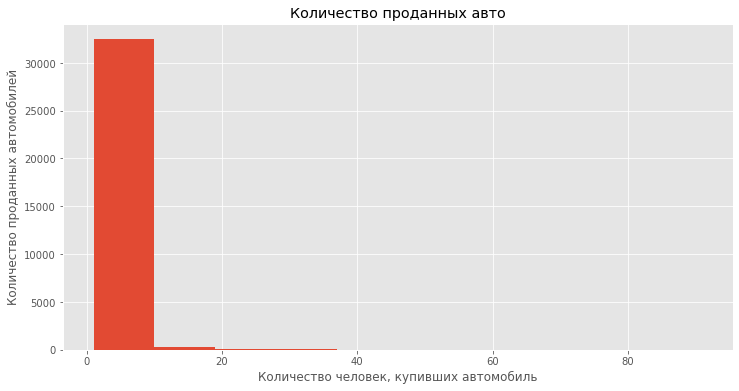

In [22]:
# Подсчет количество проданных авто
plt.figure(figsize=(12,6)) # Сделаем больше размеры фигуры
avto['sum'].hist(label='количество проданных авто') # Добавим к каждой из гистограмм название
#plt.legend(loc='upper left') # Укажем отображение легенды
plt.title('Количество проданных авто'); # Укажем название фигуры
plt.xlabel('Количество человек, купивших автомобиль')
plt.ylabel('Количество проданных автомобилей')
plt.show()

In [23]:
# Подсчет 
avto_sum = avto['sum'].value_counts().sort_values(ascending=False)
# Вывод результатов
avto_sum

1.00     30390
2.00       953
3.00       425
4.00       237
5.00       168
6.00       114
7.00       100
8.00        59
11.00       41
9.00        41
10.00       40
12.00       38
15.00       26
13.00       25
16.00       24
14.00       24
18.00       21
17.00       13
21.00       13
20.00       13
25.00        9
19.00        8
30.00        8
29.00        8
23.00        7
22.00        7
26.00        5
28.00        3
40.00        3
39.00        3
33.00        2
31.00        2
46.00        2
24.00        2
35.00        2
37.00        2
34.00        2
27.00        2
56.00        2
41.00        1
36.00        1
38.00        1
32.00        1
91.00        1
Name: sum, dtype: int64

**Вывод:**
- У нас в данных есть физические лица (те, кто преобретает по 1 автомобилю) их больше всего -  30390 человек.
- Дальше по 2 авто преобретают 953 человека, что в 31 раз меньше в первом случае. 
- В целом мы видим, что основную машин часть преобретают для личного использования. Также есть и организации, которые закупают оптовыми партиями.

In [24]:
avto['transmission'].unique()

array(['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       '5 МТ', '6AT', '5MT', '6АТ', '5МТ', 'MT', 'МТ', 'MТ', '6АT', '6MT',
       'Powershift S6', 'PowershiftS6', 'PowershifТS6', '6МТ', '6MТ', nan,
       'Мех.', 'МКПП', '6 AT', '6 MT', '8АТ', '5AT', '5АТ', '7DCT',
       '7 DCT', '7DCТ', 'АТ', 'CVT', 'N', 'CVT(вариатор)', 'CVТ', '6 МТ',
       '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT', '4AT', 'АКПП6', 'АКПП4',
       '9AT', 'АКПП', 'АКПП8', 'МКПП4', 'МКПП5', 'CVT (вариатор)',
       'CVT(вариATор)', 'CVТ(вариатор)', '6AT/MT', '9АТ', '12AT', '7AT',
       '7АТ', '6М/Т', '6M/T', '6M/Т', '0', 'PDK', '8АКПП', '8-ступ АКПП',
       '8', ' -', '-', '7 DSG', '7DSG', '6 DSG', '6DSG', 'CVТ(вАриАтор)',
       '5MТ', 'АТ (автомат)', '8 AT 4Motion', '8АТ4МoТion', '6A', '5M',
       '6-ступАКПП', '6А', 'AT (автомат)', '7DSG4МoТion', '6Aвтомат',
       '6Aатомат', '5М', '5-ступМТ', 'АT', 'A/T', '7АT', 'МТ (механика

- Прямое назначение трансмиссии автомобиля - пошагово регулировать крутящий момент от маховика и распределять его по ведущим колёсам.

- Механизмы трансмиссии  позволяют согласовать работу ДВС с сопротивлением движению транспортного средства, расширяя тяговое усилие на ведущих колесах, диапазон изменения оборотов.

- Схема трансмиссии автомобиля зависит от того – переднеприводный или заднеприводный автомобиль перед нами.

- У транспортного средства с приводом на задние ведущие колеса в составе трансмиссии чаще всего можно встретить сцепление, коробку передач, карданный механизм, задний ведущий мост в сборе. Такой вариант очень популярен у коммерческого транспорта (включая, грузовики, автобусы).

- У транспорта с приводом на передние колеса (самый распространённый вариант у легковых авто) в состав трансмиссии чаще всего входят: сцепление, трансэксл, карданный привод на передние ведущие колеса и шарниры равных угловых скоростей. 


Информация взята с сайта /https://pro-sensys.com/info/articles/obzornye-stati/transmissiya//

- У нас в датасете из-за заполнения вручную людьми, одна и та же трансмиссия заполнена по-разному. При покупке водители чаще всего хотят купить или механику, или автомат, будем ориентироваться на это.
- Есть не понятные значения трансмиссии: 

`'N' (1 автомобиль) - автоматическая коробка передач;

'0' (105 автомобилей) - здесь трудно понять какие трансмиссии у автомобилей, пока поставим 'unknown'

' -'(3 автомобиля) - прочитав описания, выяснила, что у это маханическая коробка передач;

'-', (1 авто) - маханическая коробка передач`

- Так же есть пропуски в трансмиссии это 1192 значений, что составляет	3.63%. Пока поставим skip

In [25]:
avto['transmission'].fillna('skip', inplace=True)
avto['transmission'].unique()

array(['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       '5 МТ', '6AT', '5MT', '6АТ', '5МТ', 'MT', 'МТ', 'MТ', '6АT', '6MT',
       'Powershift S6', 'PowershiftS6', 'PowershifТS6', '6МТ', '6MТ',
       'skip', 'Мех.', 'МКПП', '6 AT', '6 MT', '8АТ', '5AT', '5АТ',
       '7DCT', '7 DCT', '7DCТ', 'АТ', 'CVT', 'N', 'CVT(вариатор)', 'CVТ',
       '6 МТ', '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT', '4AT', 'АКПП6',
       'АКПП4', '9AT', 'АКПП', 'АКПП8', 'МКПП4', 'МКПП5',
       'CVT (вариатор)', 'CVT(вариATор)', 'CVТ(вариатор)', '6AT/MT',
       '9АТ', '12AT', '7AT', '7АТ', '6М/Т', '6M/T', '6M/Т', '0', 'PDK',
       '8АКПП', '8-ступ АКПП', '8', ' -', '-', '7 DSG', '7DSG', '6 DSG',
       '6DSG', 'CVТ(вАриАтор)', '5MТ', 'АТ (автомат)', '8 AT 4Motion',
       '8АТ4МoТion', '6A', '5M', '6-ступАКПП', '6А', 'AT (автомат)',
       '7DSG4МoТion', '6Aвтомат', '6Aатомат', '5М', '5-ступМТ', 'АT',
       'A/T', '7АT', 'МТ

In [26]:
# переименование трансмиссии
def trans(param): # Через ключевое слово def задают имя функции, а в скобках — её параметры. 
    if param == 'ТipТronic':
        return 'manual'
    elif param == 'Tiptronic':
        return 'manual'
    elif param == 'Мех.':
        return 'manual'
    elif param == 'МКПП':
        return 'manual'
    elif param == 'МКПП4':
        return 'manual'
    elif param == 'МКПП5':
        return 'manual'
    elif param == 'МТ (механика)':
        return 'manual'
    elif param == 'Механическая':
        return 'manual'
    elif param == 'MT':
        return 'manual'
    elif param == ' -':
        return 'manual'
    elif param == '-':
        return 'manual'
    elif param == '0':
        return  'unknown'
    elif param == 'skip':
        return  'skip'
    return 'automat'
avto['transmission'] = avto['transmission'].apply(trans)
avto['transmission'].value_counts() # чтение событий

automat    25200
manual      6357
skip        1192
unknown      105
Name: transmission, dtype: int64

In [27]:
avto['type_drive'].unique()

array([nan, 'FWD', 'передний', 'quattro', 'Quattro', 'RWD', '4WD',
       'Полный', 'Задний', 'AWD', 'Передний', '4х2.2', 'Полный ',
       'задний', '2WD', '2 WD', '4 WD', '4х4', '4х2', '4x2', 'FR',
       '2WD/4WD', '2х4', '4x4', 'CVT', '0', ' -', '-', 'P/TIME', 'FF',
       'полный', '4Motion', 'передний '], dtype=object)

**Вывод:**
- Здаесь так же, как и в столбце о трансмиссии данные не единообразны. Тип привода важная составляющая для покупки/продажи автомобиля, поэтому хдесь необходимо привести к таким значениям:
 - 4WD полный привод (quattro,Quattro,4WD,Полный,AWD,'Полный ', 4 WD,4х4, P/TIME, 'полный', 4Motion);
 - FWD передний привод ('FWD','передний',Передний,CVT, FF, 'передний ');
 - RWD задний привод (RWD, '4х2.2,задний,FR,' -', '-', )
 - 2WD подключаемые ('2WD', '2 WD', 4х2, 2WD/4WD,2х4)
 - неизвестные (0, )

In [28]:
avto['type_drive'].fillna('skip', inplace=True)
avto['type_drive'].unique()

array(['skip', 'FWD', 'передний', 'quattro', 'Quattro', 'RWD', '4WD',
       'Полный', 'Задний', 'AWD', 'Передний', '4х2.2', 'Полный ',
       'задний', '2WD', '2 WD', '4 WD', '4х4', '4х2', '4x2', 'FR',
       '2WD/4WD', '2х4', '4x4', 'CVT', '0', ' -', '-', 'P/TIME', 'FF',
       'полный', '4Motion', 'передний '], dtype=object)

In [29]:
percent_deleted = len(avto[avto['type_drive'] == 'skip']) / len(avto) * 100
print("Процент удаленных данных составит: {:.2f}%".format(percent_deleted))

Процент удаленных данных составит: 6.89%


In [30]:
avto.drop(avto[avto['type_drive'] == 'skip'].index, inplace=True) # удаляем данные, так как там много пропусков

In [31]:
privod = avto.loc[avto['type_drive'] == 'P/TIME']
privod

,year_sale,month_sale,company,brand,model,year,country,fuel,volume,transmission,type_drive,region,client,sum,price_usd,sale_usd,area,segment,class,date_sale
20494,2019,1,Allur Auto,SsangYong,Nomad,2016,KAZ,Бензин,2.3,automat,P/TIME,Петропавловск,Физ. Лицо,1.00,18310.13,18310.13,Северо-Казахстанская область,Внедорожники,Компактные SUV,1_2019


In [32]:
def privod(param): # Через ключевое слово def задают имя функции, а в скобках — её параметры. 
    if param in['quattro','Quattro','4WD','Полный','AWD','Полный ', '4 WD','4х4', 'P/TIME', 'полный', '4Motion'] :
        return '4WD'
    elif param in ['FWD','передний','Передний','CVT','FF', 'передний ']:
        return 'FWD'
    elif param in ['RWD', '4х2.2','задний','FR',' -', '-', ]:
        return 'RWD'
    elif param in ['2WD', '2 WD', '4х2', '2WD/4WD','2х4']:
        return '2WD'
    elif param == '0':
        return 'unknown'
    return 'skip'
avto['type_drive'] = avto['type_drive'].apply(privod)
avto['type_drive'].value_counts() # чтение событий

4WD        12198
FWD         9903
2WD         6363
RWD         1748
skip         260
unknown      117
Name: type_drive, dtype: int64

In [33]:
avto.tail(3)

,year_sale,month_sale,company,brand,model,year,country,fuel,volume,transmission,type_drive,region,client,sum,price_usd,sale_usd,area,segment,class,date_sale
32851,2019,9,Eurasia Motor Premium,Cadillac,XT5,2016,BLR,Бензин,3.60,automat,4WD,Алматы,Физ. Лицо,1.00,66115.70,66115.70,г.Алматы,Внедорожники,Полноразмерные SUV,9_2019
32852,2019,7,Хино Моторс Казахстан,Hino,500,2018,JPN,Дизель,4.00,automat,2WD,Алматы,Юр. Лицо,1.00,38053.05,38053.05,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,7_2019
32853,2019,9,Хино Моторс Казахстан,Hino,500,2018,JPN,Дизель,4.00,automat,2WD,Алматы,Юр. Лицо,1.00,75690.00,75690.00,г.Алматы,Коммерческие автомобили,Малотоннажные грузовики,9_2019


In [34]:
avto['volume'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '0', '1.8', '1.596',
       '1596', '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', '1600', '1.998', '1.598',
       '1.248', '2.359', '2359', '1999', '3.8', '3800', '1.591', '1.368',
       '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774',
       '1598', '1774', '4.6', '3,5', '5.7', '10.5', '2/2,5', '4', '5.5',
       '12', '1.2', '3.6', '6.5', '4.5', '1.25', '1.3', '0.002', '0.0016',
       '1998', '13', '16', '1400', '2.3', '1.33', '2,4G', '2.693', '2693',
       '2.235', '2235', '2.0', '14860', '14.8', '6.7', '1,2T', '4.88',
       4.88, 4.0, 2.0, 6.6, 7.8, 2.8, 3.6], dtype=object)

**Вывод :**
- Здесь также нужно данные привести к единообразию.

In [35]:
avto['volume'].fillna('skip', inplace=True)
avto['volume'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', 'skip', '0', '1.8', '1.596',
       '1596', '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', '1600', '1.998', '1.598',
       '1.248', '2.359', '2359', '1999', '3.8', '3800', '1.591', '1.368',
       '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774',
       '1598', '1774', '4.6', '3,5', '5.7', '10.5', '2/2,5', '4', '5.5',
       '12', '1.2', '3.6', '6.5', '4.5', '1.25', '1.3', '0.002', '0.0016',
       '1998', '13', '16', '1400', '2.3', '1.33', '2,4G', '2.693', '2693',
       '2.235', '2235', '2.0', '14860', '14.8', '6.7', '1,2T', '4.88',
       4.88, 4.0, 2.0, 6.6, 7.8, 2.8, 3.6], dtype=object)

In [36]:
avto.drop(avto[avto['volume'] == '0'].index, inplace=True) # удаляем данные, так как там много пропусков

In [37]:
percent_deleted = len(avto[avto['volume'] == 'skip']) / len(avto) * 100
print("Процент удаленных данных составит: {:.2f}%".format(percent_deleted))

Процент удаленных данных составит: 0.52%


In [38]:
#volume = avto.loc[avto['volume'] == 'skip'] # очень много пропущенных значений, лучше удалить потеря будет незначительной
avto.drop(avto[avto['volume'] == 'skip'].index, inplace=True)

In [39]:
avto['volume'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', '1.8', '1.596', '1596',
       '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', '1600', '1.998', '1.598',
       '1.248', '2.359', '2359', '1999', '3.8', '3800', '1.591', '1.368',
       '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774',
       '1598', '1774', '4.6', '3,5', '5.7', '10.5', '2/2,5', '4', '5.5',
       '12', '1.2', '3.6', '6.5', '4.5', '1.25', '1.3', '0.002', '0.0016',
       '1998', '13', '16', '1400', '2.3', '1.33', '2,4G', '2.693', '2693',
       '2.235', '2235', '2.0', '14860', '14.8', '6.7', '1,2T', '4.88',
       4.88, 4.0, 2.0, 6.6, 7.8, 2.8, 3.6], dtype=object)

In [40]:
volume = avto.loc[avto['volume'] == '4.88']

In [41]:
avto['volume']
def volume(param): # Через ключевое слово def задают имя функции, а в скобках — её параметры. 
    if param in['3000'] :
        return '3'
    elif param in ['2400', '2/2,5', '2,4G']:
        return '2.4'
    elif param in ['1800']:
        return '1.8'
    elif param in ['1400 turbo','1,4 Turbo', '1400']:
        return '1.4'
    elif param in ['1,6 T-GDI', '1600', '1690', '0.0016']:
        return '1.6'
    elif param == '2359':
        return '2.3'
    elif param in['1999', '1998']:
        return '1.9'
    elif param == '3800':
        return '3.8'
    elif param == '3470':
        return '3.4'
    elif param in ['1596','1598']:
        return '1.5'
    elif param in ['2000', '0.002']:
        return '2'
    elif param == '1774':
        return '1.7'
    elif param == '2693':
        return '2.7'
    elif param =='2235':
        return '2.2'
    elif param =='14860':
        return '14.8'
    elif param =='1,2T':
        return '1.2'
    elif param == '3,5':
        return '3.5'
    elif param in ["'4.88'",'4.88' ]:
        return '4.8'
    else:
        return param
avto['volume'] = avto['volume'].apply(volume)
avto['volume'].value_counts() # чтение событий

1.6     6279
2       5864
2.7     4406
2.5     3999
1.5     2350
        ... 
4.5        1
10.5       1
7.8        1
2.9        1
3.6        1
Name: volume, Length: 74, dtype: int64

In [42]:
avto['volume'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', '1.8', '1.596', '2.4', '1.7',
       '6.2', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5', '3.9',
       '7.5', '11', '3.933', '12.3', '3.7', '5.6', '7.8', '2.9', '5.2',
       '10.3', '8.7', '1.998', '1.598', '1.248', '2.359', '2.3', '1.9',
       '3.8', '1.591', '1.368', '3.342', '3.47', '3.4', '1.999', '1.69',
       '1.774', '4.6', '5.7', '10.5', '4', '5.5', '12', '1.2', '3.6',
       '6.5', '4.5', '1.25', '1.3', '13', '16', '1.33', '2.693', '2.235',
       '2.0', '14.8', '6.7', '4.8', 4.88, 4.0, 2.0, 6.6, 7.8, 2.8, 3.6],
      dtype=object)

In [43]:
avto['client'].unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, ' '], dtype=object)

In [44]:
avto['client'].fillna('skip', inplace=True)
avto['client'].unique()

array(['Физ. Лицо', 'Юр. Лицо', 'skip', ' '], dtype=object)

In [45]:
def client(param): # Через ключевое слово def задают имя функции, а в скобках — её параметры. 
    if param in[' '] :
        return 'skip'
    else:
        return param
avto['client'] = avto['client'].apply(client)
avto['client'].value_counts() # чтение событий   

Физ. Лицо    19063
Юр. Лицо      6099
skip          5266
Name: client, dtype: int64

In [46]:
percent_deleted = len(avto[avto['client'] == 'skip']) / len(avto) * 100
print("Процент удаленных данных составит: {:.2f}%".format(percent_deleted))

Процент удаленных данных составит: 17.31%


**Вывод:**
- Большое количество пропусков `skip`, при удалени данных потеряем 17.53%, значит нужно пропуски заполнить.

In [47]:
def client_group(row):
    if row['sum'] >= 3:
        if row['client'] == 'skip':
            return 'Юр. Лицо'
    return row['client']

avto['client'] = avto.apply(client_group, axis=1)
avto['client'].value_counts()

Физ. Лицо    19063
Юр. Лицо      7473
skip          3892
Name: client, dtype: int64

In [48]:
def client_group(row):
    if row['sum'] <= 2:
        if row['client'] == 'skip':
            return 'Физ. Лицо'
    return row['client']

avto['client'] = avto.apply(client_group, axis=1)
avto['client'].value_counts()

Физ. Лицо    22950
Юр. Лицо      7473
skip             5
Name: client, dtype: int64

In [49]:
percent_deleted = len(avto[avto['client'] == 'skip']) / len(avto) * 100
print("Процент удаленных данных составит: {:.2f}%".format(percent_deleted))

Процент удаленных данных составит: 0.02%


In [50]:
avto.drop(avto[avto['client'] == 'skip'].index, inplace=True)

In [51]:
avto['client'].value_counts()

Физ. Лицо    22950
Юр. Лицо      7473
Name: client, dtype: int64

In [52]:
def nan_values(avto):
    count_missing = avto.isna().sum()
    percent_missing = round(avto.isna().sum() * 100 / len(avto), 2)
    
    missing_value_av = pd.DataFrame({'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_av

nan_values(avto)

,num_missing,percent_missing
year_sale,0,0.00
month_sale,0,0.00
company,0,0.00
brand,0,0.00
model,0,0.00
year,46,0.15
country,0,0.00
fuel,47,0.15
volume,0,0.00
transmission,0,0.00


**Выводы:**

- Здесь мы видим большой разброс в названиях. Нужно привести к единообразию для дальнейшего анализа.

In [53]:
# сохраняем количество строк в исходном DataFrame
num_rows_before = len(df)

# сохраняем количество строк в обработанном DataFrame
num_rows_after = len(avto)

# вычисляем процент потерянных данных
percent_lost = (num_rows_before - num_rows_after) / num_rows_before * 100
print("Процент удаленных данных: {:.2f}%".format(percent_lost))

Процент удаленных данных: 7.40%


**Вывод:**
- Мы провели предобработку данных:


    1) Удалили ненужные столбцы,данные где было много пропусков. В итоге потеряли 7.4%
    2) Переименовали для удобства названия на латиницу
    3) Привели к единообразию стоблбцы :
       3.1. с трансмиссией, оставили два: механика и автомат
       3.2. с приводом
       3.3. с объемом двигателя.
       3.4. Заполнили пропуски в категории покупателей. Те, кто купил более 3 авто, Юр. лицо.

## Анализ рынка

In [54]:
# вычисление общей прибыли для каждого заказа
avto['profit'] = avto['sale_usd'] - avto['price_usd']
colms = ['price_usd', 'profit', 'sale_usd']
for colm in colms:
    # downcast='signed' приводит данные к минимально возможному типу числовых данных
    avto[colm] = pd.to_numeric(avto[colm], downcast='signed')
avto[colms].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30423 entries, 1 to 32853
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_usd  30423 non-null  float64
 1   profit     30423 non-null  float64
 2   sale_usd   30423 non-null  float64
dtypes: float64(3)
memory usage: 950.7 KB


In [55]:
# Перевод строковых значений
#data['visits'] = data['visits'].astype('int')
avto['sum'] = avto['sum'].astype('int')
avto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30423 entries, 1 to 32853
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year_sale     30423 non-null  int64  
 1   month_sale    30423 non-null  int64  
 2   company       30423 non-null  object 
 3   brand         30423 non-null  object 
 4   model         30423 non-null  object 
 5   year          30377 non-null  object 
 6   country       30423 non-null  object 
 7   fuel          30376 non-null  object 
 8   volume        30423 non-null  object 
 9   transmission  30423 non-null  object 
 10  type_drive    30423 non-null  object 
 11  region        30423 non-null  object 
 12  client        30423 non-null  object 
 13  sum           30423 non-null  int32  
 14  price_usd     30423 non-null  float64
 15  sale_usd      30423 non-null  float64
 16  area          30423 non-null  object 
 17  segment       30423 non-null  object 
 18  class         30423 non-nu

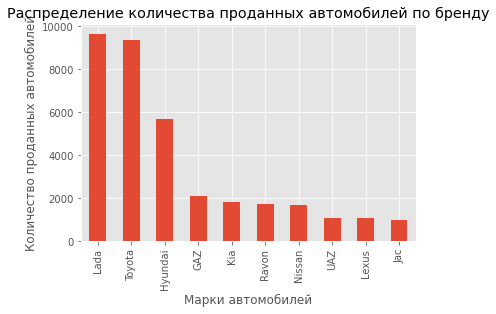

In [56]:
top_quantity = avto.groupby('brand')['sum'].sum().nlargest(10)
top_quantity.plot(kind='bar',grid=True)
plt.title('Распределение количества проданных автомобилей по бренду')
plt.xlabel('Марки автомобилей')
plt.ylabel('Количество проданных автомобилей')
plt.show()

**Выводы**

- По количеству проданных автомобилей в лидерах Lada, что связано скорее всего с соотношением цена/качество, чуть чуть ей уступает Toyota.
- Количество проданных автомобилей марки Hyundai практически в два раза ниже лидеров.

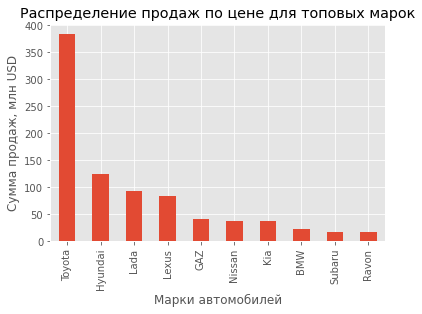

In [57]:
top_sum = avto.groupby('brand')['sale_usd'].sum().nlargest(10)
top_sum = top_sum / 1000000  # Разделение на 1 миллион
top_sum.plot(kind='bar', grid=True)
plt.title('Распределение продаж по цене для топовых марок')
plt.xlabel('Марки автомобилей')
plt.ylabel('Сумма продаж, млн USD')
plt.show()

**Выводы:**
- Не смотря на то, что Toyota занимает второе место по количеству проданных автомобилей, по суммам продаж эта марка на первом месте.
- Скорее всего это связано с тем, что цены у брендов разные и цели у покупателей отличаются друг от друга. 

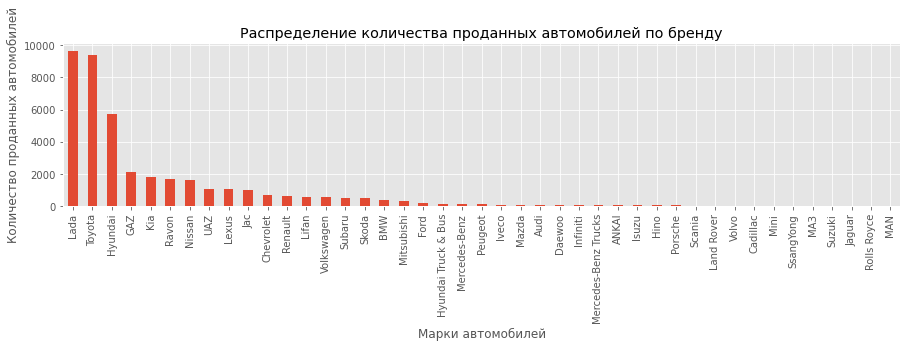

In [58]:
plt.figure(figsize=(15, 3))
top_quantit = avto.groupby('brand')['sum'].sum().nlargest(60)
top_quantit.plot(kind='bar',grid=True)
plt.title('Распределение количества проданных автомобилей по бренду')
plt.xlabel('Марки автомобилей')
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.ylabel('Количество проданных автомобилей')
plt.show()

**Выводы:**

- Больше всего проданно машин марок Lada, Toyota, Hyundai.
- Остальные сильно уступают топ-3 лидерам.
- Стоит отметить, что машины марок GAZ, Kia, Ravon, Nissan находятся примерно на одном уровне по количеству проданных.
- UAZ, Lexus и Jac - находятся на 8,9,10 месах соответственно.

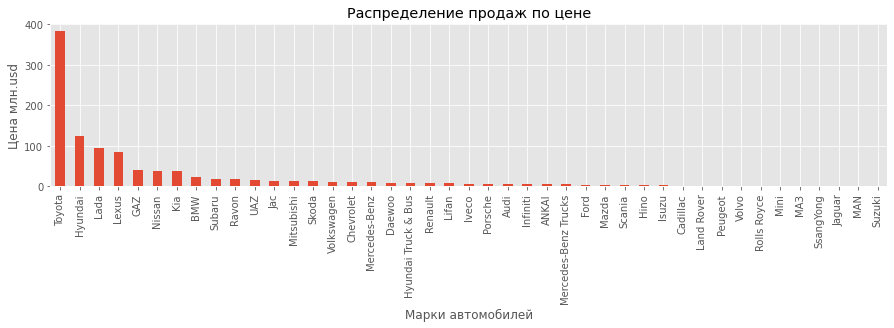

In [59]:
top_quantity = avto.groupby('brand')['sale_usd'].sum().nlargest(60)
top_quantity = top_quantity / 1000000 # разделим на миллион
plt.figure(figsize=(15, 3))
top_quantity.plot(kind='bar',grid=True)
plt.title('Распределение продаж по цене')
plt.xlabel('Марки автомобилей')
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.ylabel('Цена млн.usd')
plt.show()

**Выводы:**
- В денежном выражении лидирует маркa Toyota.
- Hyundai, Lada, Lexus - расположились сильно ниже.
- GAZ, Nissan, Kia, BMW, Subaru, Ravon.
- Лидеры в денежном и натуральном варажениях не сходятся.
- Это может быть связано с регионами лидеров продаж - в зависимости от состояния дорог покупатели предпочитают ту, или иную марку магин.
- Так же это может быть связано с ценой на комплектующие.

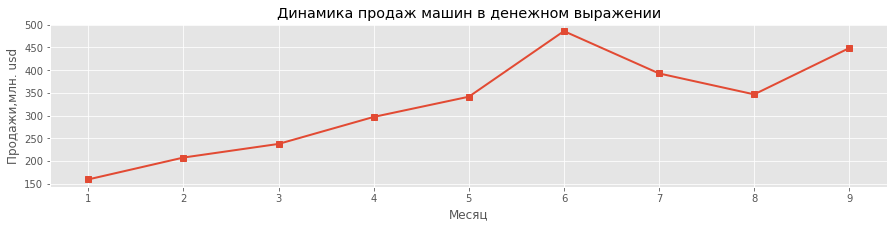

In [60]:
# добавление столбца с общей суммой продаж за месяц
avto['sales_total'] = avto['sale_usd'] * avto['sum']

# группировка данных по месяцам и суммирование продаж за каждый месяц
monthly_sales = avto.groupby('month_sale')['sales_total'].sum()
monthly_sales = monthly_sales / 1000000 # делим на миллион
#plt.figure(figsize=(15, 3),grid=True)
fig, ax = plt.subplots(figsize=(15, 3))
ax.grid(True)
# создание графика
plt.plot(monthly_sales.index,
         monthly_sales.values,
         linewidth=2,  # толщина линии
         marker='s')  # маркер)

# настройка меток осей и заголовка графика
plt.xlabel('Месяц')
plt.ylabel('Продажи,млн. usd')
plt.title('Динамика продаж машин в денежном выражении')

# отображение графика
plt.show()

**Выводы:**
- Пик продаж приходится на июнь.
- Затем интерес постепенно спадает до августа, к сентябрю снова начинает расти спрос на автомобили.
- Это может быть связано с сезоном отпусков. Люди хотят приобрести машину, чтобы отпавитсья на ней в путешествие.

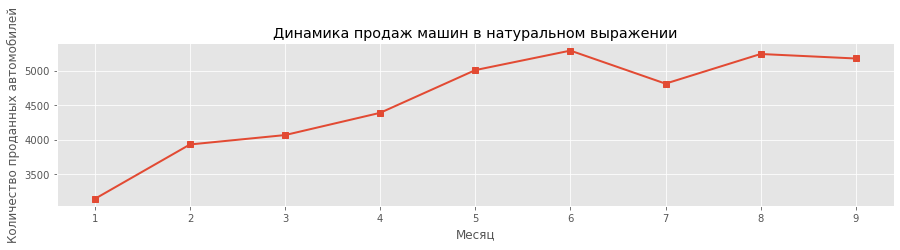

In [61]:
# группировка данных по месяцам и суммирование продаж за каждый месяц
monthly_sales = avto.groupby('month_sale')['sum'].sum()

# создание графика
#plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(figsize=(15, 3))
ax.grid(True)
plt.plot(monthly_sales.index,
         monthly_sales.values,
         linewidth=2,  # толщина линии
         marker='s')  # маркер)

# настройка меток осей и заголовка графика
plt.xlabel('Месяц')
plt.ylabel('Количество проданных автомобилей')
plt.title('Динамика продаж машин в натуральном выражении')

# отображение графика
plt.show()

**Выводы:**

- В натуральном выражении мы видим, что больше всего машин покупают в июне и августе. 
- В начале лета перед отпуском, в конце лета перед учебным годом.
- Мы видим четкую линию продаж идущую вверх, что говорит о спросе машин.

In [62]:
avto['fuel'].fillna('skip', inplace=True)
avto['fuel'].unique()

array(['Бензин', 'Дизель', 'гибрид', 'skip', 'дизель ', 'Газовый'],
      dtype=object)

In [63]:
def fuel(param): # Через ключевое слово def задают имя функции, а в скобках — её параметры. 
    if param in['Дизель','дизель '] :
        return 'дизель'
    else:
        return param
avto['fuel'] = avto['fuel'].apply(fuel)
avto['fuel'].value_counts() # чтение событий

Бензин     29655
дизель       633
Газовый       70
skip          47
гибрид        18
Name: fuel, dtype: int64

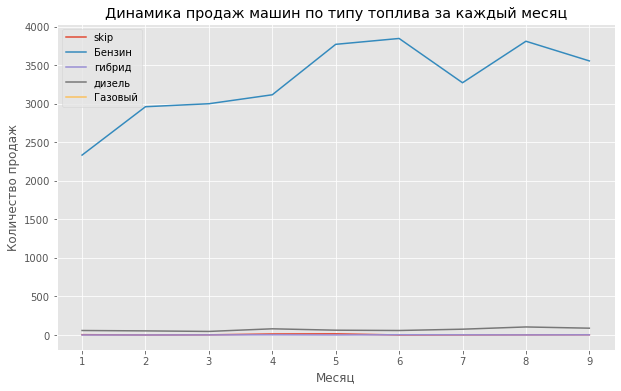

In [64]:
# Группировка данных по месяцу и типу топлива
fuel_count_by_month = avto.groupby(['month_sale', 'fuel']).size().reset_index(name='count')

# Создание графика
plt.figure(figsize=(10, 6))

# Цикл по уникальным значениям 'fuel'
for fuel in fuel_count_by_month['fuel'].unique():
    fuel_data = fuel_count_by_month[fuel_count_by_month['fuel'] == fuel]
    plt.plot(fuel_data['month_sale'], fuel_data['count'], label=fuel)

# Настройка внешнего вида графика
plt.title('Динамика продаж машин по типу топлива за каждый месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.legend()

plt.show()

**Выводы:**
- Лидером продаж по типу топлива является бензин.
- Дизельные, гибридные и газовые сильно не дотягивают даже до второго места.

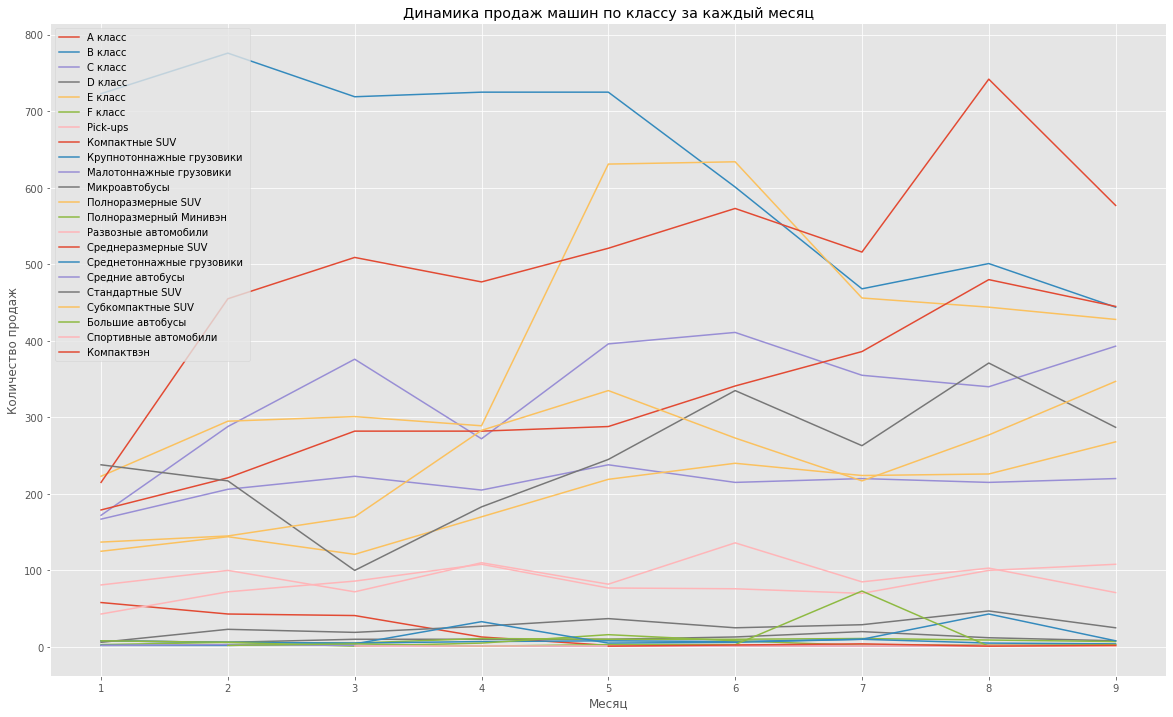

In [65]:
# Группировка данных по месяцу и классу
class_count_by_month = avto.groupby(['month_sale', 'class']).size().reset_index(name='count')

# Создание графика
plt.figure(figsize=(20, 12))

# Цикл по уникальным значениям 'class'
for clas in class_count_by_month['class'].unique():
    class_data = class_count_by_month[class_count_by_month['class'] == clas]
    plt.plot(class_data['month_sale'], class_data['count'], label=clas)

# Настройка внешнего вида графика
plt.title('Динамика продаж машин по классу за каждый месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.legend()

plt.show()


**Выводы:**

- В зависимости от времени года можно выделить несколько лидеров:
      - Зима 
            - небольшие городские автомобили B-класса, 
            - в феврале начинается спрос на относятся полноприводные кроссоверы (и переднеприводные «паркетники») построенные на платформах классов «C» или «B+», а так же внедорожники которые, по своим размерам, соответствуют «стандартам гольф-класса». Это наиболее популярный и, как следствие, наиболее «насыщенный» сегмент «вседорожников».
      
      - Весной, начиная с марта 
             - к вышеперечисленным классам прибавляются ещё  С-класс и Е-класс.
             - При этом представительский или бизнес-класс, делает сильный скачок продажах начиная с апреля, что может говорить о сезонности и нестабильности продаж.
             
- В целом можно рассматривать продажи в зависимости от сезона, так как смотря на график лидера в начале года, мы видим обвал начиная с мая.
- Если смотерть на Компактные SUV, то стабильности так же нет.Есть пики, но так же и провалы.
- Тоже самое можно сказать про машины E-класса.

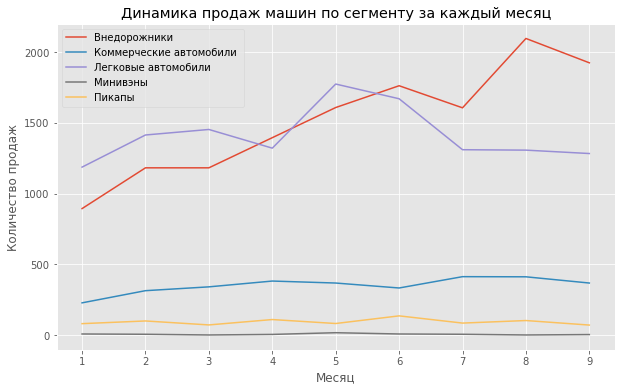

In [66]:
# Группировка данных по месяцу и сегменту
segment_count_by_month = avto.groupby(['month_sale', 'segment']).size().reset_index(name='count')

# Создание графика
plt.figure(figsize=(10, 6))

# Цикл по уникальным значениям 'segment'
for segment in segment_count_by_month['segment'].unique():
    segment_data = segment_count_by_month[segment_count_by_month['segment'] == segment]
    plt.plot(segment_data['month_sale'], segment_data['count'], label=segment)

# Настройка внешнего вида графика
plt.title('Динамика продаж машин по сегменту за каждый месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.legend()

plt.show()

**Выводы:**
- В семгентном разрезе легковые машины лидирую в начале календарного года, но их обгоняют внедорожники.
- А вот в коммерчесом сегменте - всё относительно стабильно.

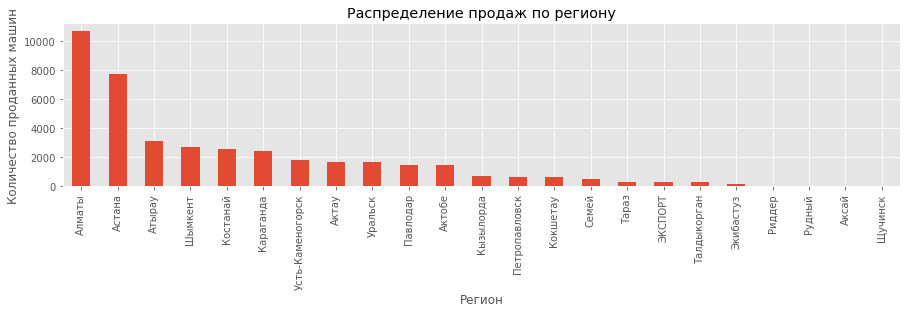

In [67]:
reg_quantity = avto.groupby('region')['sum'].sum().nlargest(60)
plt.figure(figsize=(15, 3))
reg_quantity.plot(kind='bar',grid=True)
plt.title('Распределение продаж по региону')
plt.xlabel('Регион')
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.ylabel('Количество проданных машин')
plt.show()

**Выводы:**

- Лидером продаж является бывшая столица Казахстана Алматы.
- Второе место занимает Астана.
- Значительно уступают лидерам города Атырау, Шымкент, Костанай, Караганда.
- Скорее всего это связано с количеством населения, а так же уровнем зарплат.

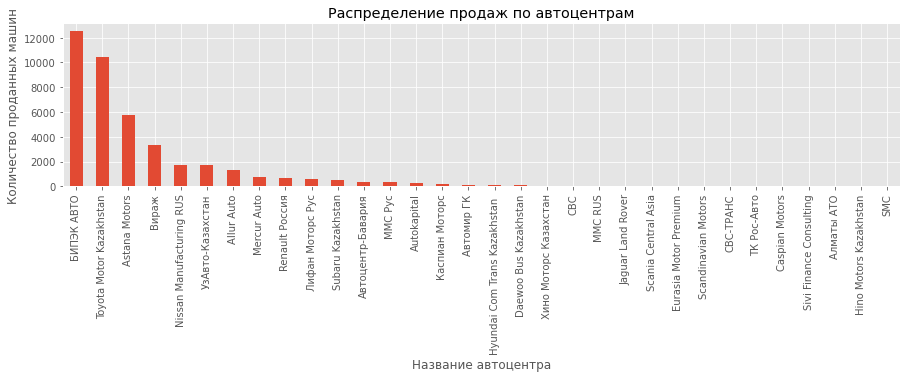

In [68]:
company_quantity = avto.groupby('company')['sum'].sum().nlargest(60)
plt.figure(figsize=(15, 3))
company_quantity.plot(kind='bar',grid=True)
plt.title('Распределение продаж по автоцентрам')
plt.xlabel('Название автоцентра')
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.ylabel('Количество проданных машин')
plt.show()

**Выводы:**
- Лидерами на рынке являются Бипэк авто, продавший более 12 тыс. машин за девять месяцев.Это автомобильный холдинг с долей в 25% авторынка в настоящее время закрыт по данным на август 2023 год \https://www.gazeta.ru/auto/2021/09/27_a_14024917.shtml\
- Представитель Toyota в Казахстане чуть-чуть ему уступает. В настоящее время включает шестнадцать дилерских центров в разных городах Казахстана.\ https://www.toyotakz.com/\
- Замыкает тройку лидеров Astana Motors. \https://astana-motors.kz/ \

In [69]:
#avto['sales'] = avto['sale_usd'].astype(float) - avto['price_usd'].astype(float)
# создание сводной таблицы
sales_by_brand_class = pd.pivot_table(avto,
                                      index=['brand', 'class'],
                                      values='sum',
                                      aggfunc=np.sum)

# вывод сводной таблицы
sales_by_brand_class
# создание нового датафрейма с отсортированными значениями
top_40_sales = sales_by_brand_class.sort_values(by='sum', ascending=False).head(40)

# вывод топ 40 значений в порядке убывания
top_40_sales

,,sum
brand,class,
Lada,B класс,7289
Toyota,E класс,3440
Lada,Субкомпактные SUV,2329
Hyundai,Компактные SUV,1890
Toyota,Стандартные SUV,1765
GAZ,Малотоннажные грузовики,1700
Ravon,B класс,1506
Toyota,Среднеразмерные SUV,1454
Hyundai,B класс,1332


## Подсчет показателей

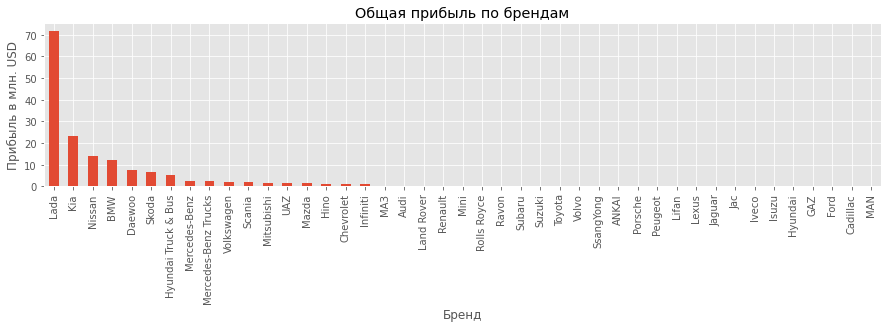

In [70]:
# Прибыль — это разница между доходами и расходами, ключевой финансовый результат работы компании.

# вычисление общей прибыли для каждого заказа
avto['profit'] = avto['sale_usd'] - avto['price_usd']
# выбор столбцов с брендом машины и ценой заказа
orders = avto[['brand', 'profit']]
# вычисление общей прибыли по брендам
profit_by_brand = orders.groupby('brand')['profit'].sum().nlargest(60)
profit_by_brand = profit_by_brand / 1000000 # делим на млн.
plt.figure(figsize=(15, 3))
profit_by_brand.plot(kind='bar',grid=True)
plt.title('Общая прибыль по брендам')
plt.xlabel('Бренд')
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.ylabel('Прибыль в млн. USD')
plt.show()

**Выводы:**

- Больше всего прибыли проносит марка машин Lada.
- Kia уступает по прибыли практически в 4 раза.
- Nissan и BMW по прибыли примероно на одной высоте.
- Daewoo и Skoda приносят пусть небольшую, но прибыль.

In [71]:
# Средняя стоимость продажи за весь период
# выбор столбца с ценой товара
price = avto['price_usd']

# Вычислить среднюю стоимость продажи за весь период.
# вычисление средней стоимости продажи
avg_price = price.mean()
print('Средняя стоимость продажи за весь период:', avg_price)

Средняя стоимость продажи за весь период: 28996.47297192067


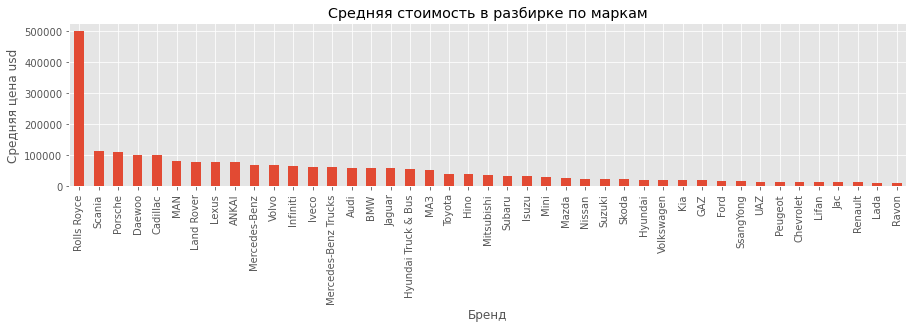

In [72]:
# выбор столбцов с маркой машины и ценой машины
cars = avto[['brand', 'price_usd']]
# вычисление средней стоимости машины для каждой марки
avg_price_by_brand = cars.groupby('brand')['price_usd'].mean().nlargest(60)
plt.figure(figsize=(15, 3))
avg_price_by_brand.plot(kind='bar',grid=True)
plt.title('Средняя стоимость в разбирке по маркам')
plt.xlabel('Бренд')
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.ylabel('Средняя цена usd')
plt.show()

**Выводы:**

- По лидерам продаж в топ- 3 вошли Lada, Toyota, Hyundai. Здесь мы видим, что они явно на последних позициях, что так привлекает большинство покупателей.
- У Rolls Royce цена выше, но и покупают его значительно реже.

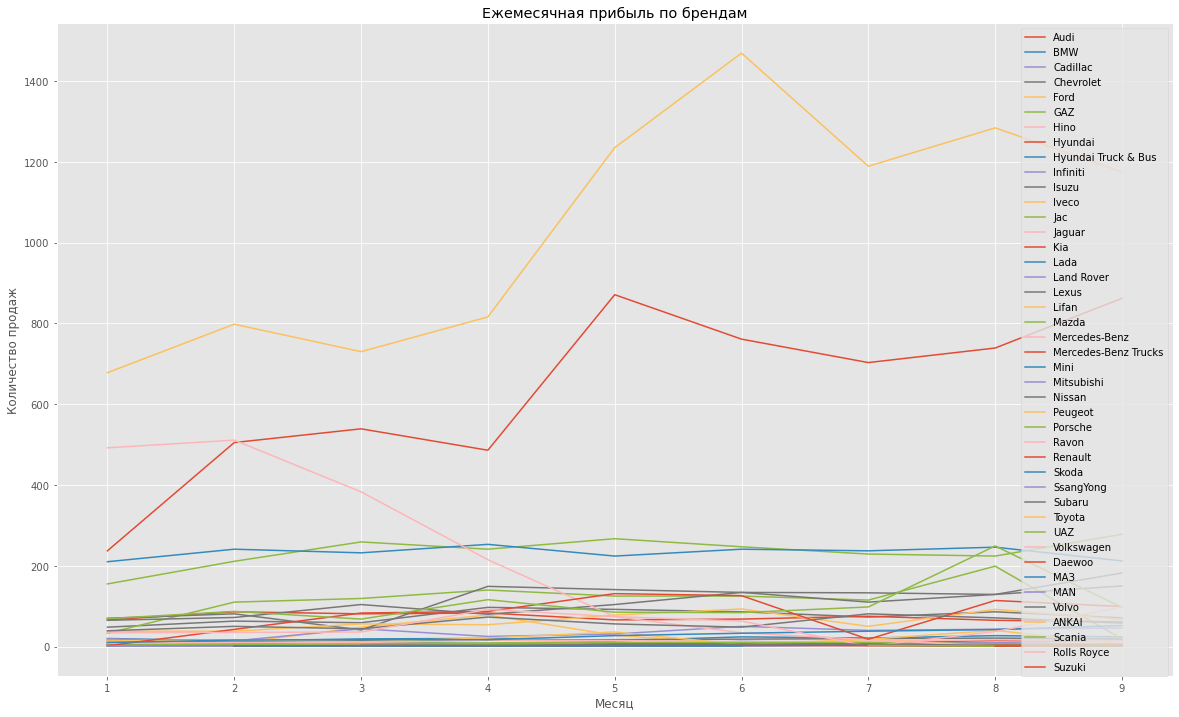

In [73]:
# Группировка данных по бренду и месяцу
segment_count_by_month = avto.groupby(['month_sale', 'brand']).size().reset_index(name='count')

# Создание графика
plt.figure(figsize=(20, 12))

# Цикл по уникальным значениям 'brand'
for brand in segment_count_by_month['brand'].unique():
    brand_data = segment_count_by_month[segment_count_by_month['brand'] == brand]
    plt.plot(brand_data['month_sale'], brand_data['count'], label=brand)

# Настройка внешнего вида графика
plt.title('Ежемесячная прибыль по брендам')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.legend()

plt.show()

**Выводы:**

- Если говорить о стабильности, то это у нас: Lada и Gaz. Ровные продажи без скачков вне зависимости от сезона.
- Toyota является лидером по количеству продаж, но у этого бренда есть резкие скачки от минимального 678 до максимального 1469.
- Так же можно выделить Hyundai.

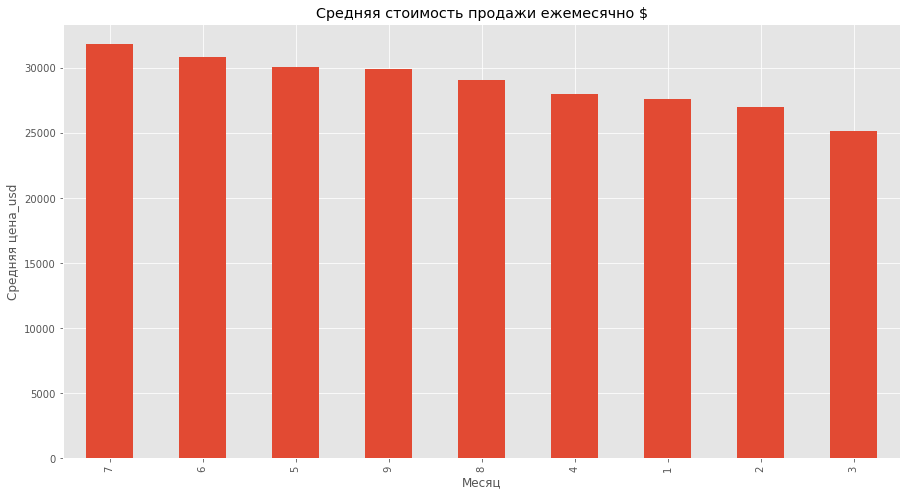

In [74]:
# выбор столбцов с маркой машины и ценой машины
#cars = avto[['brand', 'price_usd']]
# вычисление средней стоимости машины для каждой марки
price_by_month = avto.groupby('month_sale')['price_usd'].mean().nlargest(60)
plt.figure(figsize=(15, 8))
price_by_month.plot(kind='bar',grid=True)
plt.title('Средняя стоимость продажи ежемесячно $')
plt.xlabel('Месяц')
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.ylabel('Средняя цена_usd')
plt.show()

**Выводы:**

- Мы помним, что пик продаж приходится на теплое время года. Средние цены подрастают в зависимости от спроса.

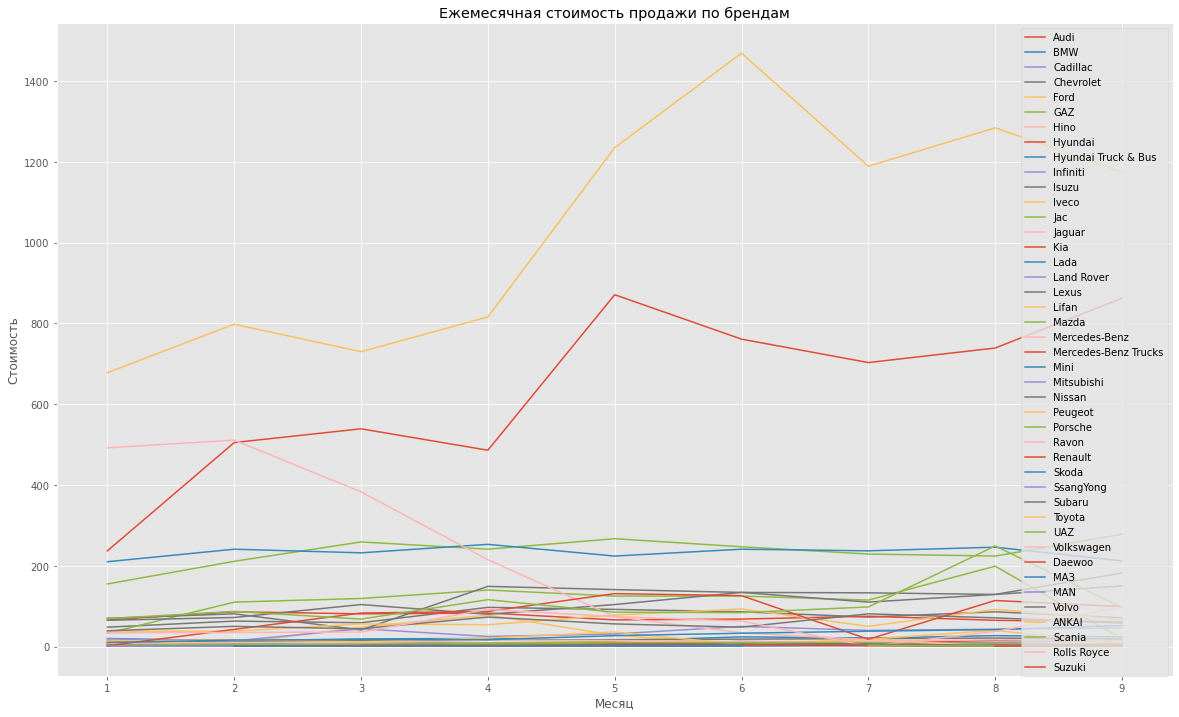

In [75]:
# Группировка данных по бренду и месяцу
segment_count = avto.groupby(['month_sale', 'brand']).size().reset_index(name='sale_usd')

# Создание графика
plt.figure(figsize=(20, 12))

# Цикл по уникальным значениям 'brand'
for brand in segment_count['brand'].unique():
    brand_data = segment_count[segment_count['brand'] == brand]
    plt.plot(brand_data['month_sale'], brand_data['sale_usd'], label=brand)

# Настройка внешнего вида графика
plt.title('Ежемесячная стоимость продажи по брендам')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')
plt.legend(fontsize=10)

plt.show()


**Выводы:**

- Ежемесячная стоимость продаж по брендам практически полностью совпадает с ежемесячной прибылью по брендам.

## Ёмкость рынка


- Рассчитать емкость рынка можно, используя данные о количестве проданных автомобилей и их цене. Для этого необходимо умножить количество проданных автомобилей на их среднюю цену на рынке.

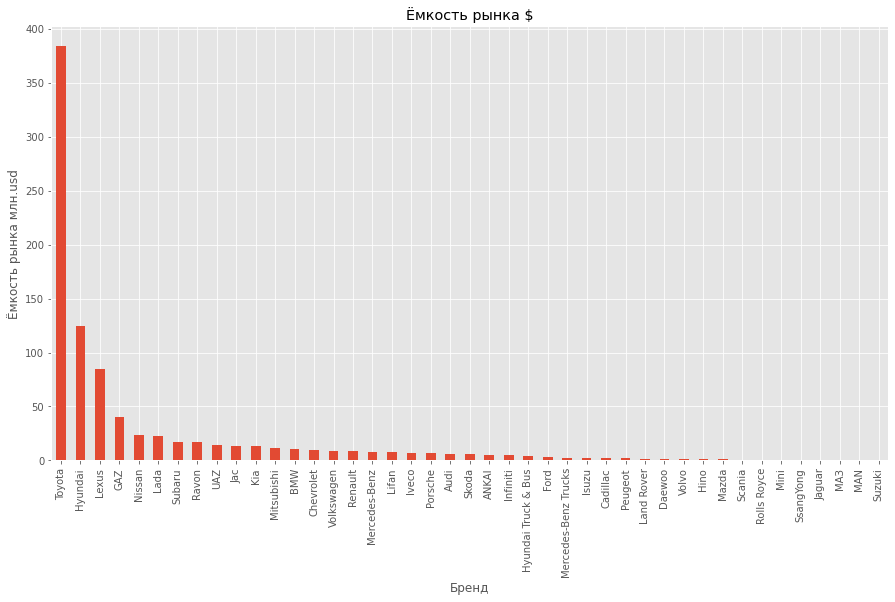

In [76]:
# Группировка данных по бренду и вычисление средней цены
avg_price = avto.groupby('brand')['price_usd'].mean()

# Группировка данных по бренду и подсчет количества продаж
sales_count = avto.groupby('brand')['sale_usd'].count()

# Расчет емкости рынка для каждого бренда
market_size = (avg_price * sales_count).nlargest(60)
market_size = market_size / 1000000 
plt.figure(figsize=(15, 8))
market_size.plot(kind='bar',grid=True)
plt.title('Ёмкость рынка $')
plt.xlabel('Бренд')
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.ylabel('Ёмкость рынка млн.usd')
plt.show()

**Выводы:**
-  Высота столбца на графике соответствует емкости рынка для каждого бренда.

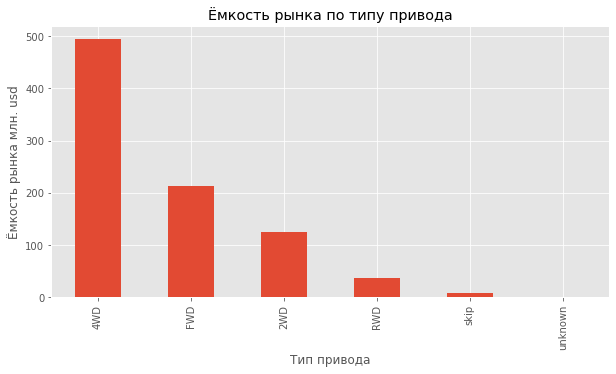

In [77]:
# Группировка данных по типу и вычисление средней цены
av_price = avto.groupby('type_drive')['price_usd'].mean()

# Группировка данных по типу и подсчет количества продаж
sale_count = avto.groupby('type_drive')['sale_usd'].count()

# Расчет емкости рынка для каждого типа
market_type = (av_price * sale_count).nlargest(60)
market_type = market_type / 1000000
plt.figure(figsize=(10, 5))
market_type.plot(kind='bar',grid=True)
plt.title('Ёмкость рынка по типу привода')
plt.xlabel('Тип привода')
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.ylabel('Ёмкость рынка млн. usd')
plt.show()

**Выводы:**

- Бесспорным лидером являются полноприводные автомобили.
- Второе место занимают переднеприводные автомобили.
- Третье место подкючаемые приводы.
- Самыми непопулярным оказался задний привод.

## Доля рынка

In [78]:
# Определение количества проданных автомобилей дилера
dealer_sales_count = avto[avto['company'] == 'Mercur Auto']['sum'].count()

# Определение общего количества проданных автомобилей на рынке
total_sales_count = avto['sum'].count()

# Расчет доли рынка дилера в количественном выражении
dealer_market_share_count = dealer_sales_count / total_sales_count * 100
print(f'Доля рынка дилера Mercur Auto в количественном выражении: {dealer_market_share_count:.2f}%')

# Определение общей стоимости проданных автомобилей дилера
dealer_sales_total = avto[avto['company'] == 'Mercur Auto']['price_usd'].sum()

# Определение общей стоимости проданных автомобилей на рынке
total_sales_total = avto['price_usd'].sum()

# Расчет доли рынка дилера в стоимостном выражении
dealer_market_share_total = dealer_sales_total / total_sales_total * 100
print(f'Доля рынка дилера Mercur Auto в стоимостном выражении: {dealer_market_share_total:.2f}%')

Доля рынка дилера Mercur Auto в количественном выражении: 1.96%
Доля рынка дилера Mercur Auto в стоимостном выражении: 2.48%


In [79]:
# Определение количества брендов у Меркур_авто
dealer_brand_count = avto[avto['company'] == 'Mercur Auto'].groupby('brand')['sale_usd'].count()

# Определение общего количества проданных автомобилей на рынке
total_brand_count = avto.groupby('brand')['sale_usd'].count()
# Расчет доли рынка дилера в количественном выражении
dealer_market_share_count = dealer_brand_count / total_brand_count * 100
print(f'Доля рынка дилера по маркам: {dealer_market_share_count.apply(lambda x: f"{x:.2f}%")}')

# Определение общей стоимости проданных автомобилей дилера
dealer_type_total = avto[avto['company'] == 'Mercur Auto'].groupby('segment')['sale_usd'].count()

# Определение общей стоимости проданных автомобилей на рынке
total_type_total = avto.groupby('segment')['sale_usd'].count()

# Расчет доли рынка дилера в стоимостном выражении
dealer_market_share_total = dealer_type_total / total_type_total * 100
print(f'Доля рынка дилера по типу машин: {dealer_market_share_total.apply(lambda x: f"{x:.2f}%")}')

Доля рынка дилера по маркам: brand
ANKAI                      nan%
Audi                    100.00%
BMW                        nan%
Cadillac                   nan%
Chevrolet                  nan%
Daewoo                     nan%
Ford                       nan%
GAZ                        nan%
Hino                       nan%
Hyundai                    nan%
Hyundai Truck & Bus        nan%
Infiniti                   nan%
Isuzu                      nan%
Iveco                      nan%
Jac                        nan%
Jaguar                     nan%
Kia                        nan%
Lada                       nan%
Land Rover                 nan%
Lexus                      nan%
Lifan                      nan%
MAN                        nan%
Mazda                      nan%
Mercedes-Benz              nan%
Mercedes-Benz Trucks       nan%
Mini                       nan%
Mitsubishi                 nan%
Nissan                     nan%
Peugeot                    nan%
Porsche                 100.00%
Ravon

**Выводы:**

- Меркур авто от всего рынка занимает всего около 2%, продавая при этом Audi, Porsche,Volkswagen.
- Минивэны пользуются наибольшим спросом, чуть меньше покупатели предпочитают легковые автомобили.
- Третье место занимают внедорожники.
- Пикапы и коммерческие автомобили пользуются наименьшим спросом.

## Конкуренты

In [80]:
# Определение доли рынка каждой марки
company_share = (avto.groupby('company')['sum'].sum() / avto['sum'].sum() * 100).nlargest(10)

# Определение лидера на рынке
market_leader = company_share.idxmax()

# Печать результата
print(f"Лидер на рынке - {market_leader}")
company_share.head(5)
print(f"Топ-10 дилеров по доле рынка в количественном выражении: {company_share.apply(lambda x: f'{x:.2f}%')}")

# Определение доли рынка каждой марки
company_share = (avto.groupby('company')['sale_usd'].sum() / avto['sale_usd'].sum() * 100).nlargest(10)

# Определение лидера на рынке
market_leader = company_share.idxmax()

# Печать результата
print(f"Лидер на рынке - {market_leader}")
company_share.head(5)
print(f"Топ-10 дилеров по доле рынка в ценовом выражении: {company_share.apply(lambda x: f'{x:.2f}%')}")

Лидер на рынке - БИПЭК АВТО
Топ-10 дилеров по доле рынка в количественном выражении: company
БИПЭК АВТО                  30.53%
Toyota Motor Kazakhstan     25.42%
Astana Motors               14.08%
Вираж                        8.18%
Nissan Manufacturing RUS     4.27%
УзАвто-Казахстан             4.21%
Allur Auto                   3.18%
Mercur Auto                  1.76%
Renault Россия               1.56%
Лифан Моторс Рус             1.38%
Name: sum, dtype: object
Лидер на рынке - Toyota Motor Kazakhstan
Топ-10 дилеров по доле рынка в ценовом выражении: company
Toyota Motor Kazakhstan     44.99%
БИПЭК АВТО                  14.57%
Astana Motors               12.38%
Вираж                        5.58%
Nissan Manufacturing RUS     4.18%
Allur Auto                   2.70%
Mercur Auto                  2.34%
Автоцентр-Бавария            2.32%
Subaru Kazakhstan            1.66%
УзАвто-Казахстан             1.65%
Name: sale_usd, dtype: object


**Выводы**:
- Лидер по количеству проданных автомобилей - Бипэк авто.
- В ценовом выражении лидером является Toyota Motor Kazakhstan.

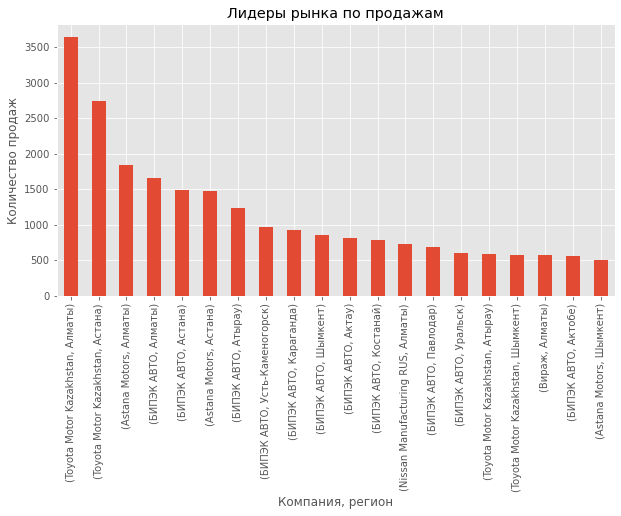

In [81]:
leader_diller = avto.groupby(['company', 'region'])['sum'].sum().nlargest(20)

plt.figure(figsize=(10, 5))
leader_diller.plot(kind='bar',grid=True)
plt.title('Лидеры рынка по продажам')
plt.xlabel('Компания, регион')
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.ylabel('Количество продаж')
plt.show()

**Выводы:**
    
    - В городе Алматы лидером по продажам является Toyota Motor Kazakhstan, Astana Motors на втором месте. Замыкает тройку лидеров Бипэк авто.
    - В Астане лидером по количеству продаж является Toyota Motors Kazakhstan, второе место у Бипэк авто, третье у Astana Motors.
    - В городе Атырау на первом месте Бипэк авто, Toyota Motor Kazakhstan на втором месте.

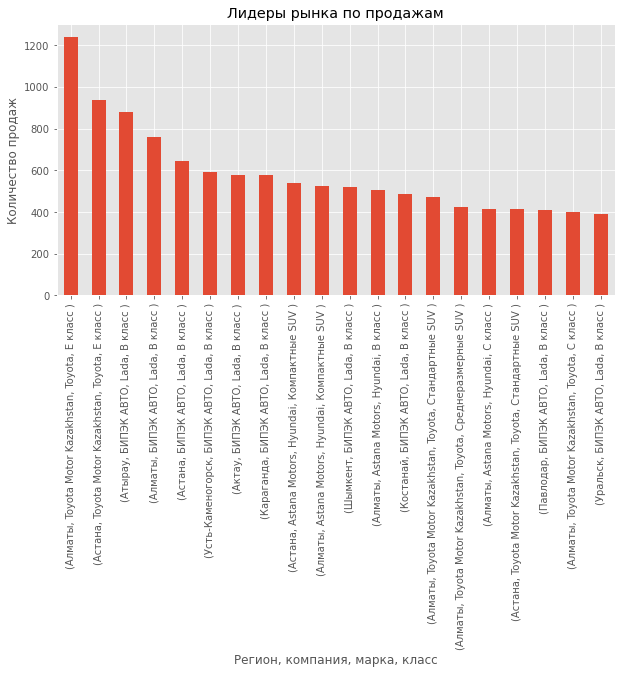

In [82]:
leader_diller = avto.groupby(['region','company', 'brand', 'class'])['sum'].sum().nlargest(20)

plt.figure(figsize=(10, 5))
leader_diller.plot(kind='bar',grid=True)
plt.title('Лидеры рынка по продажам')
plt.xlabel('Регион, компания, марка, класс')
plt.xticks(rotation = 90) # поворот надписей оси Х на 90 градусов
plt.ylabel('Количество продаж')
plt.show()

**Выводы:**

- В Алматы по количеству продаж лидирует Toyota E-класса у дилера Toyota Motor Kazahstan, второе место занимает Бипэк авто продавая больше всего марку Lada В-класса. Третье место в этом же городе у Astana Motors, Hyundai компактные SUV. B-класса.
- В столице Казахстана лидером по продажам является Toyota Motor Kazahstan продавая Toyota E-класса. второе место занимает Бипэк авто продавая больше всего марку Lada В-класса. Astana Motors занимает третье место.
- В Атырау лидирует Бипэк авто продавая больше всего марку Lada В-класса.

In [83]:
avto['region'].unique()

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Уральск',
       'Усть-Каменогорск', 'Петропавловск', 'Павлодар', 'Кокшетау',
       'Актау', 'Семей', 'Караганда', 'Актобе', 'Шымкент', 'Талдыкорган',
       'Кызылорда', 'Экибастуз', 'Рудный', 'Тараз', 'Аксай', 'Щучинск',
       'ЭКСПОРТ', 'Риддер'], dtype=object)

# Общий вывод

**По данным мы увидели лидеров на авторынке Казахстана 2019** 


- Лидер по количеству проданных автомобилей - Бипэк авто. Но, мы помним, что этот автомобильный холдинг с долей в 25% авторынка в настоящее время закрыт по данным на август 2023 год \https://www.gazeta.ru/auto/2021/09/27_a_14024917.shtml\
- В ценовом выражении лидером является Toyota Motor Kazakhstan.
- Лидирующее положение на рынке занимают бензиновые внедорожники. Это может быть связано с поставкой топлива в регион, а так же с качеством дорог.
- Основными потребителями машин в регионе являются физические лица, которые покупают машины в личное пользование.
- Лидером продаж является бывшая столица Казахстана Алматы. Второе место занимает Астана. Значительно уступают лидерам города Атырау, Шымкент, Костанай, Караганда. Скорее всего это связано с количеством населения, а так же уровнем зарплат.








**По маркам**


- По количеству проданных автомобилей в лидерах Lada, что связано скорее всего с соотношением цена/качество, чуть чуть ей уступает Toyota.
- Количество проданных автомобилей марки Hyundai практически в два раза ниже лидеров.
-  В денежном выражении лидирует маркa Toyota. Hyundai, Lada, Lexus - расположились сильно ниже.




**Динамика продаж**

- Пик продаж приходится на июнь.Затем интерес постепенно спадает до августа, к сентябрю снова начинает расти спрос на автомобили.Это может быть связано с сезоном отпусков. Люди хотят приобрести машину, чтобы отпавитсья на ней в путешествие.
- В семгентном разрезе легковые машины лидирую в начале календарного года, но их обгоняют внедорожники.А вот в коммерческом сегменте - всё относительно стабильно.
- В натуральном выражении больше всего машин покупают в июне и августе.В начале лета перед отпуском, в конце лета перед учебным годом.






- Меркур Авто занимает 1.76% по количеству продаваемых автомобилей. 
- В ценовом выражении 2.34% от продаж с января по сентябрь.
- Можно расширить ассортимент товара, за счёт "эконом класса".
- Помимо автомобилей продавать к ним комплектующие.
- Так же можно придумать опцию трансфера в счет цены автомобиля. Если потенциальный покупатель хочет именно в этом центре купить, но добраться тяжело.